# Início

## Instalando pacotes e bibliotecas necessárias

In [ ]:
#Instala a versão mais atualizada do Imbalanced-learn
!pip install -U Imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
#Instala a versão mais atualizada do matplotlib
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importa bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


## Lendo o arquivo com os dados limpos em um Data Frame

In [ ]:
#Lê o arquivo limpo e tratado
df = pd.read_csv(".../Dados/01-Telco-Customer-Churn-dados-limpos.csv")

In [ ]:
df.head()

,ID,Evasao,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Tipo_Contrato,Fatura_Digital,Valor_Mensal,...,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico_Internet,TV_Cabo,Streaming_Filmes,Transferencia_Bancaria,Cartao_Credito,Cheque_Eletronico,Cheque
0,0002-ORFBO,0,0,1,1,9,1,1,1,65.6,...,0,1,0,1,1,0,0,0,0,1
1,0003-MKNFE,0,0,0,0,9,1,0,0,59.9,...,0,0,0,0,0,1,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,0,1,73.9,...,0,0,1,0,0,0,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,1,98.0,...,0,1,1,0,1,1,0,0,1,0
4,0013-EXCHZ,1,1,1,0,3,1,0,1,83.9,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
#Retira a coluna que representa o ID dos clientes, pois não será utilizada
df = df.drop('ID', axis = 1)
df

,Evasao,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Tipo_Contrato,Fatura_Digital,Valor_Mensal,Valor_Total,...,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico_Internet,TV_Cabo,Streaming_Filmes,Transferencia_Bancaria,Cartao_Credito,Cheque_Eletronico,Cheque
0,0,0,1,1,9,1,1,1,65.60,593.30,...,0,1,0,1,1,0,0,0,0,1
1,0,0,0,0,9,1,0,0,59.90,542.40,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,4,1,0,1,73.90,280.85,...,0,0,1,0,0,0,0,0,1,0
3,1,1,1,0,13,1,0,1,98.00,1237.85,...,0,1,1,0,1,1,0,0,1,0
4,1,1,1,0,3,1,0,1,83.90,267.40,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,1,0,55.15,742.90,...,1,0,0,1,0,0,0,0,0,1
7039,1,0,1,0,22,1,0,1,85.10,1873.70,...,0,0,0,0,0,1,0,0,1,0
7040,0,0,0,0,2,1,0,1,50.30,92.75,...,0,1,0,0,0,0,0,0,0,1
7041,0,0,1,1,67,1,2,0,67.85,4627.65,...,1,0,1,1,0,1,0,0,0,1


# Machine Learning

## Balanceamento da Variável *target* (Evasao)

In [ ]:
#Mostra quantas amostras temos de cada classe (0 e 1) da variável target
df.groupby('Evasao').count()

,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Tipo_Contrato,Fatura_Digital,Valor_Mensal,Valor_Total,Gen_Feminino,...,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico_Internet,TV_Cabo,Streaming_Filmes,Transferencia_Bancaria,Cartao_Credito,Cheque_Eletronico,Cheque
Evasao,,,,,,,,,,,,,,,,,,,,,
0,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
1,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


Uma vez que temos apenas 27% dos clientes que Cancelaram seus planos, contra 73% que não cancelaram, entende-se que há a necessidade de balancear nosso dados. Portanto, optou-se por utilizar o médodo *Oversampling*, usando a técnica SMOTE (Synthetic Minority Oversampling Technique).

In [ ]:
SEED=23
smote = SMOTE(random_state=SEED)

In [ ]:
#Separa os dados em x e y
x = df.drop('Evasao', axis=1)
y = df['Evasao']

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [ ]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,Evasao,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Tipo_Contrato,Fatura_Digital,Valor_Mensal,Valor_Total,...,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico_Internet,TV_Cabo,Streaming_Filmes,Transferencia_Bancaria,Cartao_Credito,Cheque_Eletronico,Cheque
0,0,0,1,1,9,1,1,1,65.600000,593.300000,...,0,1,0,1,1,0,0,0,0,1
1,0,0,0,0,9,1,0,0,59.900000,542.400000,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,4,1,0,1,73.900000,280.850000,...,0,0,1,0,0,0,0,0,1,0
3,1,1,1,0,13,1,0,1,98.000000,1237.850000,...,0,1,1,0,1,1,0,0,1,0
4,1,1,1,0,3,1,0,1,83.900000,267.400000,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,0,0,23,1,0,0,89.423168,2169.793855,...,0,0,0,0,0,0,0,0,0,0
10344,1,0,0,0,42,0,0,0,23.223143,945.288713,...,0,0,0,0,0,0,0,0,0,0
10345,1,1,0,0,2,1,0,0,88.720373,159.984875,...,0,0,0,0,0,0,0,0,0,0
10346,1,0,1,0,37,1,0,0,76.608427,2870.420499,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Apresenta os novos dados, agora balanceados
df_balanced.groupby('Evasao').count()

,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Tipo_Contrato,Fatura_Digital,Valor_Mensal,Valor_Total,Gen_Feminino,...,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico_Internet,TV_Cabo,Streaming_Filmes,Transferencia_Bancaria,Cartao_Credito,Cheque_Eletronico,Cheque
Evasao,,,,,,,,,,,,,,,,,,,,,
0,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
1,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,...,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174


## Treinando e Testando Modelos de Machine Learning

Serão treinados e testados diferentes modelos de **Machine Learning** para **Classificar** os clientes que cancelaram ou não sei planos. 

As métricas analisadas serão: 
- Acurácia
- Precisão
- Recall
- F1

Além disso, também será feita a análise visual  partir da 
- Matriz Confusão 
- Curva ROC e AUC (Area Under the Curve).

O primeiro modelo a ser testado será o modelo Linear SVC:

### Linear SVC

In [ ]:
#Define novo x e y balanceados
x = df_balanced.drop('Evasao', axis=1)
y = df_balanced['Evasao']

In [ ]:
#Separa x e y para treino e para teste, sendo 25% da amostra para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

#Treina o modelo LinearSVC
lsvc = LinearSVC(max_iter=10000, random_state=SEED)
lsvc.fit(x_train, y_train)
y_pred = lsvc.predict(x_test)

#Imprime as métricas encontradas para Linear SVC
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.8306919211441824
Precisão: 0.8363780778395552
Recall: 0.8194552529182879
F1: 0.8278301886792452


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


O modelo apresentou um bom resultado considerando a acurácia, precisão, recall e f1, com valores acima de 80%. Porém, o aviso **"ConvergenceWarning"** continua aparecendo, mesmo ao tentar aumentar e variar o número de interações. Dada esta instabilidade e falhas de convergencia, optou-se por descartar este modelo para buscar outras possibilidades.

### Testando Diferentes Modelos

Usando a mesma metodologia que o modelo anterior, serão testados e treinados 4 modelos de classificação diferentes ao mesmo tempo para avaliar respectivas métricas, sendo estes:


*   Logistic Regression
*   K-Nearest Neighbors
*   Random Forest
*   Decision Tree


In [ ]:
#Coloca modelos em um dicionário
modelos = { 'Logistic Regression' : LogisticRegression(max_iter=10000, random_state=SEED),
            'KNN': KNeighborsClassifier(n_neighbors = 10),
            'Random Forest' : RandomForestClassifier(max_depth= 10, random_state=SEED),
            'Decision Tree' : DecisionTreeClassifier(max_depth= 10, random_state=SEED)}

In [ ]:
#Cria uma função para treinar e testar cada modelo
def fit_and_score(modelos, X_train, X_test, Y_train, Y_test):
  np.random.seed(SEED)
  
  modelo_acuracia = {}
  modelo_precisao = {}
  modelo_recall = {}
  modelo_F1 = {}
  
  for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(X_test)

    modelo_acuracia[nome] =metrics.accuracy_score(Y_test, y_pred)
    modelo_precisao[nome] =metrics.precision_score(Y_test, y_pred)
    modelo_recall[nome] =metrics.recall_score(Y_test, y_pred)
    modelo_F1[nome] =metrics.f1_score(Y_test, y_pred)
   
  return modelo_acuracia, modelo_precisao, modelo_recall, modelo_F1

In [ ]:
#Roda a função de treino e teste e comparar as métricas de cada modelo em um Data Frame
(acuracia, precisao, recall, F1) = fit_and_score(modelos = modelos,
                                                 X_train = x_train,
                                                 X_test = x_test,
                                                 Y_train = y_train,
                                                 Y_test = y_test
                                                )

In [ ]:
#Mostra as métricas em um Data Frame
metricas = {'Acuracia': acuracia,
            'Precisao': precisao,
            'Recall': recall,
            'F1':F1}
metricas =  pd.DataFrame(metricas)
metricas

,Acuracia,Precisao,Recall,F1
Logistic Regression,0.836877,0.834756,0.837354,0.836053
KNN,0.766911,0.752219,0.791440,0.771331
Random Forest,0.832625,0.810949,0.864591,0.836911
Decision Tree,0.810978,0.795691,0.833463,0.814139


Os modelos de Logistic Regression e Random Forest Classifier se mostraram mais efetivos, e portanto, serão explorados e avaliados de forma mais detalhada a seguir.

## Avaliando os Melhores Modelos

### Random Forest

In [ ]:
#Roda novamente o modelo Random Forest
rf = RandomForestClassifier(max_depth= 10, random_state=SEED)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, rf_y_pred))
print("Precisão:",metrics.precision_score(y_test, rf_y_pred))
print("Recall:",metrics.recall_score(y_test, rf_y_pred)) 
print("F1:",metrics.f1_score(y_test, rf_y_pred))

Acurácia: 0.8326246617703904
Precisão: 0.810948905109489
Recall: 0.864591439688716
F1: 0.8369114877589455


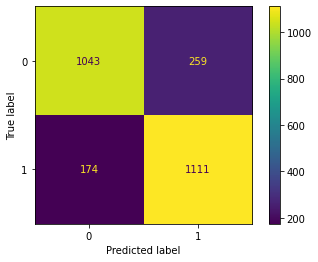

In [ ]:
#Plota Matriz Confusão Random Forest
cm_rf = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot() 

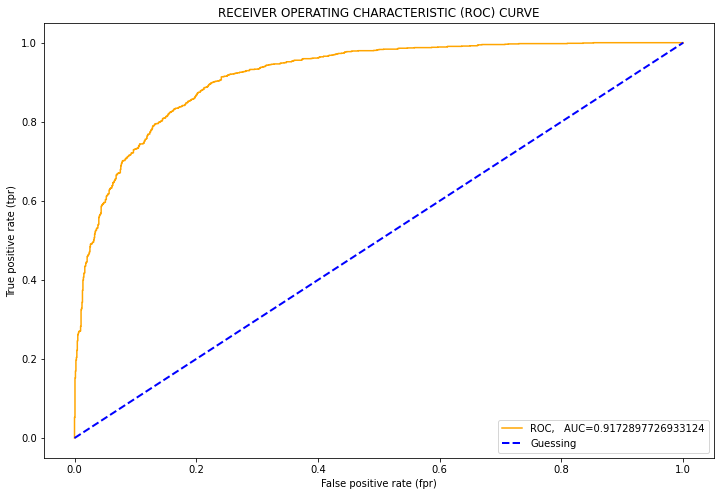

In [ ]:
#Plota Curva ROC Random Forest
rf_y_pred_proba = rf.predict_proba(x_test)[::, 1]
fpr1, tpr1, _= metrics.roc_curve(y_test, rf_y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, rf_y_pred_proba)
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr1,tpr1,color = 'orange', label="ROC,   AUC="+str(auc1))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label ='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE')
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [ ]:
#Roda novamente o modelo Logistic Regression
lr = LogisticRegression(max_iter=10000, random_state=SEED)
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, lr_y_pred))
print("Precisão:",metrics.precision_score(y_test, lr_y_pred))
print("Recall:",metrics.recall_score(y_test, lr_y_pred)) 
print("F1:",metrics.f1_score(y_test, lr_y_pred))

Acurácia: 0.836876691148048
Precisão: 0.834755624515128
Recall: 0.8373540856031129
F1: 0.836052836052836


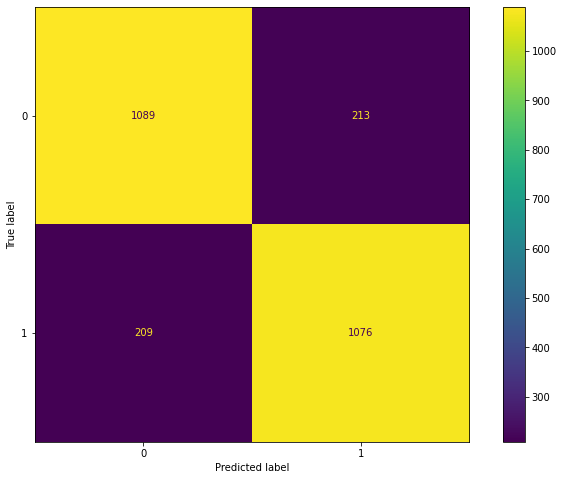

In [ ]:
#Plota Matriz Confusã Logistic Regression
cm_lr = confusion_matrix(y_test, lr_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()

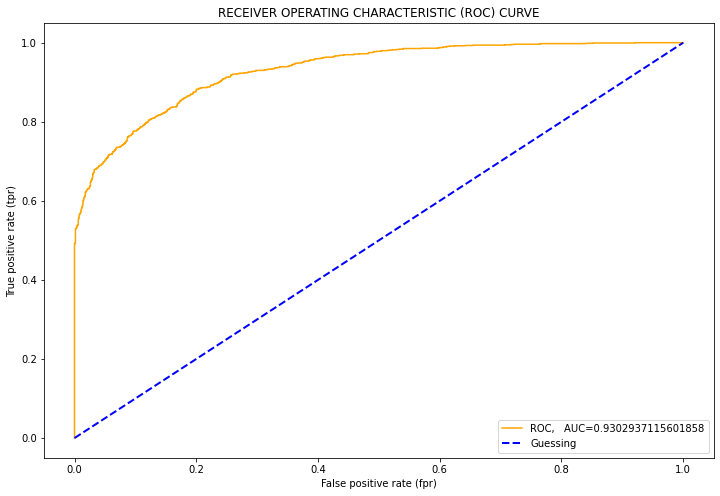

In [ ]:
#Plota Curva ROC Logistic Regression
lr_y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr2, tpr2, _= metrics.roc_curve(y_test, lr_y_pred_proba)
auc2 = metrics.roc_auc_score(y_test, lr_y_pred_proba)
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr2,tpr2,color = 'orange', label="ROC,   AUC="+str(auc2))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label ='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE')
plt.legend(loc=4)
plt.show()

### Considerações Iniciais

As matrizes confusão dos dois modelos apresentaram mais de 80% dos resultados corretos, somando os Verdadeiros Positivos e Verdadeiros Negativos, mantendo os Falsos Positivos e Falsos Negativos na ordem de 150-250.

As curvas ROC (Receiver Operating Characteristic) de ambos os modelos apresentamram um padrão bastante satisfatório, bem como o indicador AUC também ficaram acima de 0,9, o que significa que temos dois modelos que classificam bem os clientes, com base nos dados que treinamos e testamos. Porém, ainda é possível otimizar tais modelos, melhorando os resultados de forma mais alinhada ao nosso problema de negócio de forma específica.



## Otimizando os Melhores Modelos de ML

Do ponto de vista do nosso problema de negócio, precisamos identificar os clientes que tem mais chances de cancelar o plano, para que a empresa possa ter ações de retenção direcionadas para estes clientes, com o objetivo de reduzir a *Churn Rate*.

Portanto, a taxa de **Recall**, neste caso, é a métrica mais importante, uma vez que desejamos obter um modelo com maior número de Verdadeiros Positivos e menor quantidade de Falsos Negativos. Enquanto que, uma proporção maior de Falsos Positivos não seria tão prejudicial para a empresa.

Em outras palavras, o objetivo é identificar corretamente o maior número de os clientes que pretendem cancelar o plano, e se caso o modelo identifique alguns clientes como potencial cancelamento, mas que na verdade são clientes que pretendem continuar com os serviços, este "erro" não acarretria em grandes problemas. Pelo contrário, estes clientes que são Falsos Positivos poderão até serem beneficiados com as possíveis ações de retenção de clientes, ganhando mais benefícios, gerando, consequentemente, ainda mais satisfação entre os clientes que já estavam satisfeitos.

Visto que os dois modelos apresentaram métricas muito próximas, ao invés de escolher apenas um deles para otimizar, foi decidido otimizar os dois (Random Forest e Logistic Regression e posteiormente verificar qual dos dois poderá apresentar melhor desempenho.

### Otimizando Hiperparametros com Randomized Search Cross Validation

#### Random Forest

In [ ]:
#Cria grid de hiperparametros
rf_grid = { 'n_estimators': [10,50,100,150,200,250,300],
           'max_depth' : [None, 3, 5, 10, 15],
           'min_samples_split': np.arange(2, 22, 2),
           'min_samples_leaf': np.arange (1, 20, 2),
           'criterion' : ['gini', 'entropy'],
           'bootstrap' : [True, False],
           'max_features' : ['sqrt', 'log2', None],
           'class_weight' : [{0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6}]}

Foram selecionados os principais hiperparametos de otimização em modelos Random Forest Classifier, desacando o "class_weight" que foi configurado para dar maior peso para Evasão positiva, fazendo com que o modelo de certa forma "penalize" mais os Falsos Negativos do que que os Falsos Positivos.

Além disso, ao configurar o Randomized Search Cross Validation, o *scoring = 'recall'* garante a configuração do modelo com melhor **Recall**.

In [ ]:
# Setup Randomized Search Cross Validation 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           random_state = SEED,
                           scoring = 'recall', 
                           verbose=True)
# Treina Randomized Search CV
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300]},
                   random_state=23, scoring='rec

Melhores Parametros Encontrados:

In [ ]:
#Mostra os melhores parametros para Random Forest
rs_rf.best_params_

{'bootstrap': False,
 'class_weight': {0: 0.2, 1: 0.8},
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 13,
 'min_samples_split': 2,
 'n_estimators': 300}

Métricas do modelo otimizado:

In [ ]:
rfn = RandomForestClassifier(**rs_rf.best_params_, random_state=SEED)
rfn.fit(x_train, y_train)
rfn_y_pred = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, rfn_y_pred))
print("Precisão:",metrics.precision_score(y_test, rfn_y_pred))
print("Recall:",metrics.recall_score(y_test, rfn_y_pred)) 
print("F1:",metrics.f1_score(y_test, rfn_y_pred))


Acurácia: 0.68689601855431
Precisão: 0.6144578313253012
Recall: 0.9922178988326849
F1: 0.7589285714285714


### Logistic Regression

In [ ]:
#Cria grid de hiperparametros
lr_grid = {'C': np.logspace(-4, 4, 20),
           'penalty' : ['l1', 'l2', 'elasticnet', ' none'],
           'solver': ['liblinear'],
           'class_weight' : [{0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6}]}

Da mesma forma aqui, foram selecionados os principais hiperparametos de otimização em modelos Logistic Regression Classifier, utilizando o  "class_weight" para "penalizar" os Falsos Negativos.



In [ ]:
# Setup Randomized Search Cross Validation 
np.random.seed(SEED)
rs_lr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=lr_grid,
                           cv=5,
                           n_iter=20, 
                           scoring = 'recall',
                           verbose=True)

# Treina Randomized Search CV
rs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, sel

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [{0: 0.2, 1: 0.8},
                                                         {0: 0.3, 1: 0.7},
                                                         {0: 0.4, 1: 0.6}],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    ' none'],
                                        'solver': ['liblinear']},
                   scoring='recall', verbose=True)

Melhores Parametros:

In [ ]:
rs_lr.best_params_

{'C': 29.763514416313132,
 'class_weight': {0: 0.2, 1: 0.8},
 'penalty': 'l1',
 'solver': 'liblinear'}

Métricas do modelo otimizado:

In [ ]:
lrn = LogisticRegression(**rs_lr.best_params_, random_state=SEED)
lrn.fit(x_train, y_train)
lrn_y_pred = lrn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, lrn_y_pred))
print("Precisão:",metrics.precision_score(y_test, lrn_y_pred))
print("Recall:",metrics.recall_score(y_test, lrn_y_pred)) 
print("F1:",metrics.f1_score(y_test, lrn_y_pred))

Acurácia: 0.7812137611132586
Precisão: 0.7050770108385624
Recall: 0.9618677042801557
F1: 0.8136932192231733


### Comparando Resultados


In [ ]:
#Cria listas com nomes e métricas de cada modelo treinado e testado, considerando os primeiros e os otimizados
modelos2 = ['RandomForest Linha de Base', 'RandomForest otimizado', 'LogisticRegression Linha de Base', 'LogisticRegression otimizado']
Acuracia = [metrics.accuracy_score(y_test, rf_y_pred)*100, metrics.accuracy_score(y_test, rfn_y_pred)*100, metrics.accuracy_score(y_test, lr_y_pred)*100, metrics.accuracy_score(y_test, lrn_y_pred)*100]
Precisao = [metrics.precision_score(y_test, rf_y_pred)*100, metrics.precision_score(y_test, rfn_y_pred)*100, metrics.precision_score(y_test, lr_y_pred)*100, metrics.precision_score(y_test, lrn_y_pred)*100]
Recall = [metrics.recall_score(y_test, rf_y_pred)*100, metrics.recall_score(y_test, rfn_y_pred)*100, metrics.recall_score(y_test, lr_y_pred)*100, metrics.recall_score(y_test, lrn_y_pred)*100]
F1_ = [metrics.f1_score(y_test, rf_y_pred)*100, metrics.f1_score(y_test, rfn_y_pred)*100, metrics.f1_score(y_test, lr_y_pred)*100, metrics.f1_score(y_test, lrn_y_pred)*100]


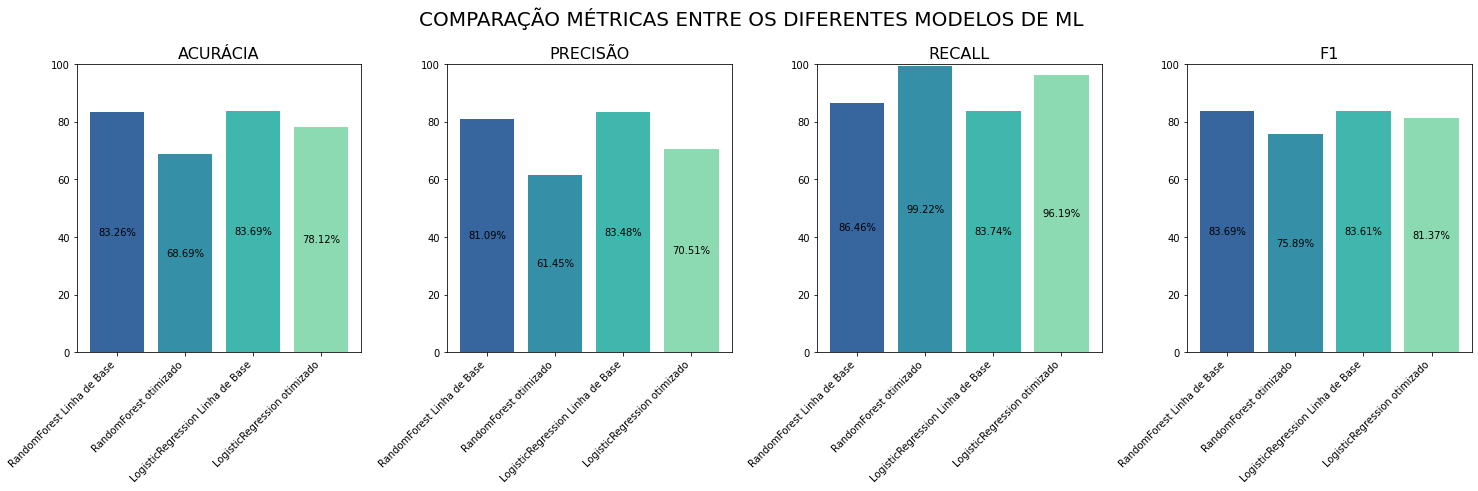

In [ ]:
#Plota gráficos de comparação das métricas dos modelos iniciais (linha de base) e os modelos otimizados
colors = ['#37659e', '#348fa7', '#40b7ad', '#8bdab2']

plt.figure(figsize = ((25, 10)))

x = modelos2
y = Acuracia
plt.subplot(1, 4, 1)
acc = plt.bar(x, y, color = colors)
plt.xticks(rotation=45, ha='right')
plt.bar_label(container=acc, fmt='%.2f%%',  label_type='center')
plt.ylim(top=100)
plt.title("ACURÁCIA", fontsize = 16)


x = modelos2
y = Precisao
plt.subplot(1, 4, 2)
pcs = plt.bar(x, y, color = colors)
plt.xticks(rotation=45, ha='right')
plt.bar_label(container=pcs, fmt='%.2f%%',  label_type='center')
plt.ylim(top=100)
plt.title("PRECISÃO", fontsize = 16)

x = modelos2
y = Recall
plt.subplot(1, 4, 3)
rcl = plt.bar(x, y, color = colors)
plt.xticks(rotation=45, ha='right')
plt.bar_label(container=rcl, fmt='%.2f%%',  label_type='center')
plt.ylim(top=100)
plt.title("RECALL", fontsize = 16)

x = modelos2
y = F1_
plt.subplot(1, 4, 4)
f = plt.bar(x, y, color = colors)
plt.xticks(rotation=45, ha='right')
plt.bar_label(container=f, fmt='%.2f%%',  label_type='center')
plt.ylim(top=100)
plt.title("F1", fontsize = 16)

plt.suptitle("COMPARAÇÃO MÉTRICAS ENTRE OS DIFERENTES MODELOS DE ML", fontsize = 20)

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.savefig('/content/drive/Shareddrives/Aline/ALINE/aline/ESTUDOS/DATA SCIENCE/ALURA DS CHALENGE/Graficos/comparacao_metricas_modelos_ML.png', format='png')
plt.savefig('/content/drive/Shareddrives/Aline/ALINE/aline/ESTUDOS/DATA SCIENCE/ALURA DS CHALENGE/Graficos/comparacao_metricas_modelos_ML.jpeg', format='jpeg')
plt.show()

O gráfico mostra que o **Recall** dos modelos otimizados ficaram acima de 96% porém, consequentemente, houve uma redução na ácurácia, precisão e F1, sendo esta redução muito mais significativa no modelo Random Forest.

In [ ]:
#Cria as matrizes Consusão dos modelos otimizados
cm_rfn = confusion_matrix(y_test, rfn_y_pred)
cm_lrn = confusion_matrix(y_test, lrn_y_pred)

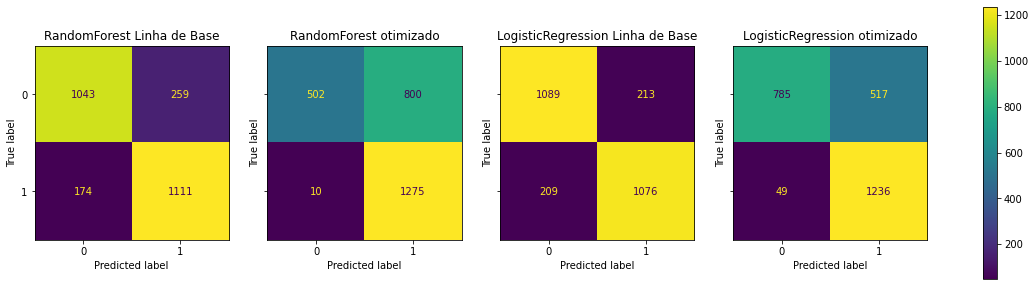

In [ ]:
#Plota as Matrizes Confusão dos 4 modelos
f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(ax= axes[0])
disp.ax_.set_title('RandomForest Linha de Base')
disp.im_.colorbar.remove()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfn)
disp.plot(ax= axes[1])
disp.ax_.set_title('RandomForest otimizado')
disp.im_.colorbar.remove()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(ax= axes[2])
disp.ax_.set_title('LogisticRegression Linha de Base')
disp.im_.colorbar.remove()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_lrn)
disp.plot(ax= axes[3])
disp.ax_.set_title('LogisticRegression otimizado')
disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.savefig('/content/drive/Shareddrives/Aline/ALINE/aline/ESTUDOS/DATA SCIENCE/ALURA DS CHALENGE/Graficos/comparacao_matriz-confusao_modelos_ML.png', format='png')
plt.savefig('/content/drive/Shareddrives/Aline/ALINE/aline/ESTUDOS/DATA SCIENCE/ALURA DS CHALENGE/Graficos/comparacao_matriz-confusao_modelos_ML.jpeg', format='jpeg')
plt.show()




Percebe-se que alcançamos o objetivo de reduzir ainda mais os Falsos Negativos ao otimizar os modelos. 

In [ ]:
#Cria as Curvas ROC dos modlos otimizados
rfn_y_pred_proba = rfn.predict_proba(x_test)[::, 1]
fpr3, tpr3, _= metrics.roc_curve(y_test, rfn_y_pred_proba)
auc3 = metrics.roc_auc_score(y_test, rfn_y_pred_proba)

lrn_y_pred_proba = lrn.predict_proba(x_test)[::, 1]
fpr4, tpr4, _= metrics.roc_curve(y_test, lrn_y_pred_proba)
auc4 = metrics.roc_auc_score(y_test, lrn_y_pred_proba)

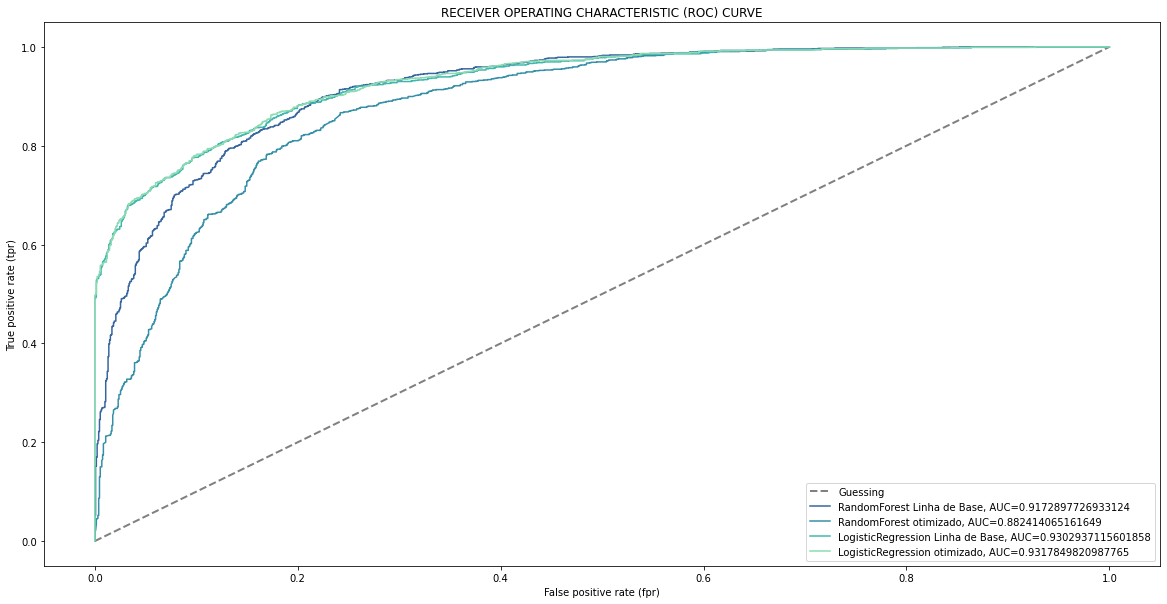

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10.)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label ='Guessing')
plt.plot(fpr1,tpr1,color = '#37659e', label='RandomForest Linha de Base, AUC='+str(auc1))
plt.plot(fpr3,tpr3,color = '#348fa7', label='RandomForest otimizado, AUC='+str(auc3))
plt.plot(fpr2,tpr2,color = '#40b7ad', label='LogisticRegression Linha de Base, AUC='+str(auc2))
plt.plot(fpr4,tpr4,color = '#8bdab2', label='LogisticRegression otimizado, AUC='+str(auc4))
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE')
plt.legend(loc=4)
plt.savefig('/content/drive/Shareddrives/Aline/ALINE/aline/ESTUDOS/DATA SCIENCE/ALURA DS CHALENGE/Graficos/comparacao_curvaROC_modelos_ML.png', format='png')
plt.savefig('/content/drive/Shareddrives/Aline/ALINE/aline/ESTUDOS/DATA SCIENCE/ALURA DS CHALENGE/Graficos/comparacao_curvaROC_modelos_ML.jpeg', format='jpeg')
plt.show()

plt.figure(0).clf()

E por fim, avaliando a Curva ROC e a Área acima da Curva (AUC), o modelo Random Forest otimizado sofreu uma piora em seu padrão, enquanto o modelo Logistic Regression se manteve muito próximo ao da Linha de Base e ainda aumentou leventemente a AUC.

# Considerações Finais

Ao comparar os resultados dos modelos iniciais com os modelos otimizados, percebe-se que houve uma melhora significativa na métrica **Recall**, que passou de 86,4% para 99,2% no modelo Random Forest e de 83,7% para 96,1% no modelo Logistic Regression, sendo que este último, ainda manteve as demais métricas acima de 70%.
Além disso, a Curva ROC e AUC do modelo Logistic Regression também permaneceu mais adequado em comparação com o RF.

Sendo assim, o modelo indicado para Classificar nossos clientes e reduzir a *Churn Rate* é o modelo de **Logistic Regression** com a segunte configuração de parametros:
- C: 29.763514416313132,
- class_weight: {0: 0.2, 1: 0.8},
- penalty: 'l1',
- solver : 'liblinear'